In [10]:
import pandas as pd
from merlion.utils import TimeSeries


In [11]:
df=pd.read_csv("Bitcoin_price.csv")
df.head()

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [3]:
df.set_index('DATE', inplace=True)
df.index = pd.to_datetime(df.index)
df.index.freq = 'MS'

In [7]:
df_ts = TimeSeries.from_pd(df, freq='MS')
print(df_ts.is_aligned)
df_ts_train, df_ts_test = df_ts.bisect('2015-07-01')

True


In [8]:
from merlion.models.automl.autosarima import AutoSarima, AutoSarimaConfig

sarima_config = AutoSarimaConfig(auto_pqPQ=True, auto_d=True, auto_D=True, auto_seasonality=True,approximation=True, maxiter=5)
sarima = AutoSarima(sarima_config)

train_pred, train_err = sarima.train(df_ts_train, train_config={"enforce_stationarity": True,"enforce_invertibility": True})

sarima_fc = sarima.forecast(df_ts_test.time_stamps)

Inferred granularity <MonthBegin>


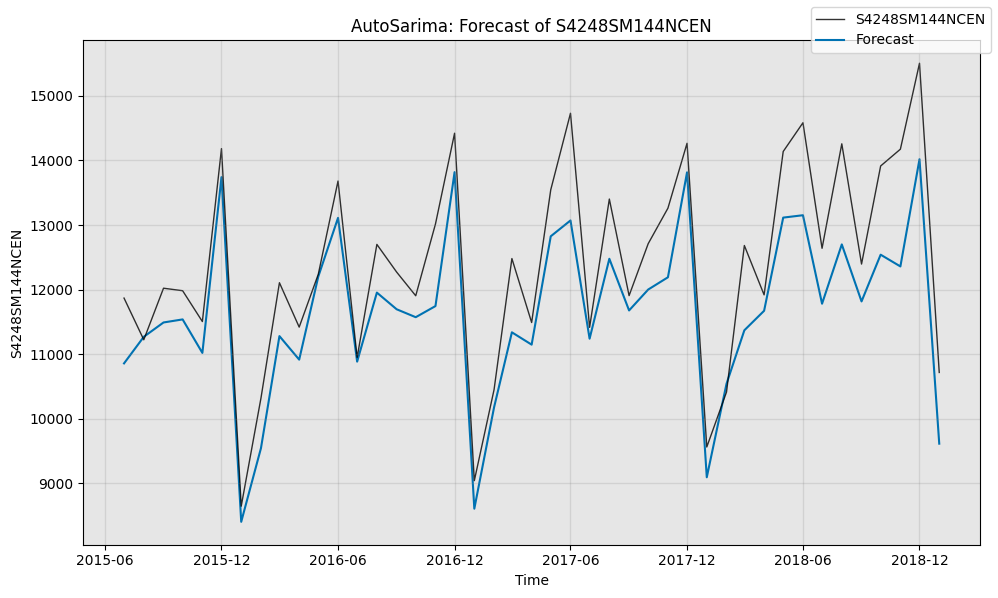

In [9]:
import matplotlib.pyplot as plt
fig, ax = sarima.plot_forecast(time_series=df_ts_test)
plt.show()

In [7]:
from merlion.models.forecast.trees import LGBMForecaster, LGBMForecasterConfig

lgbm_config = LGBMForecasterConfig(maxlags = 30,max_forecast_steps=len(df_ts_test))

lgbm = LGBMForecaster(lgbm_config)
lgbm.train(df_ts_train)

lgbm_fc = lgbm.forecast(df_ts_test.time_stamps)

Inferred granularity <MonthBegin>


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 252, number of used features: 30
[LightGBM] [Info] Start training from score 7560.261905
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

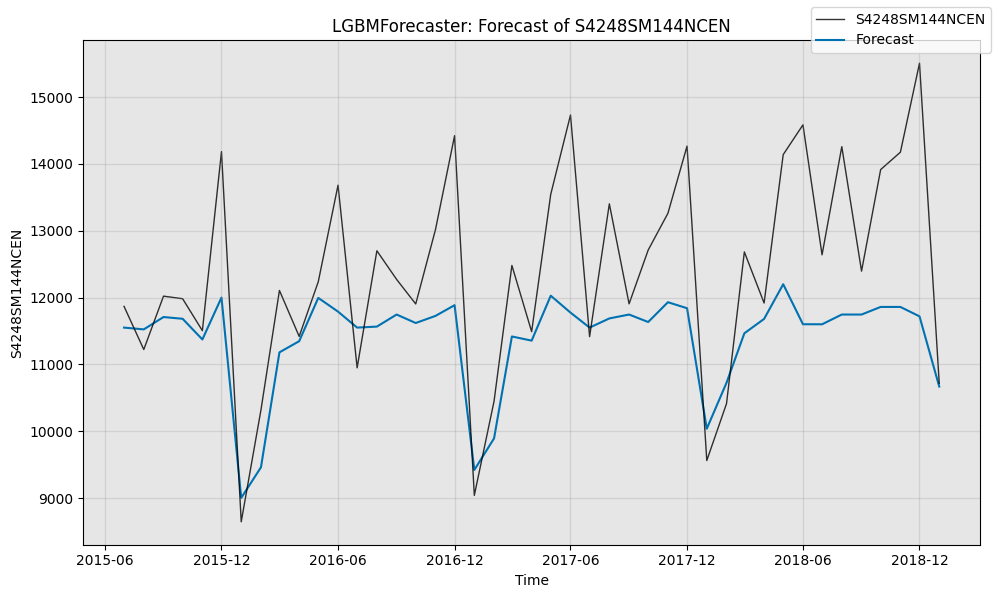

In [8]:
fig, ax = lgbm.plot_forecast(time_series=df_ts_test)
plt.show()

Inferred granularity <MonthBegin>
C:\Users\shrav\AppData\Roaming\Python\Python311\site-packages\merlion\models\forecast\ets.py:145: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self._last_val = train_data[-1]
C:\Users\shrav\AppData\Roaming\Python\Python311\site-packages\merlion\models\forecast\ets.py:145: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self._last_val = train_data[-1]
C:\Users\shrav\AppData\Roaming\Python\Python311\site-packages\merlion\models\forecast\ets.py:145: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labe

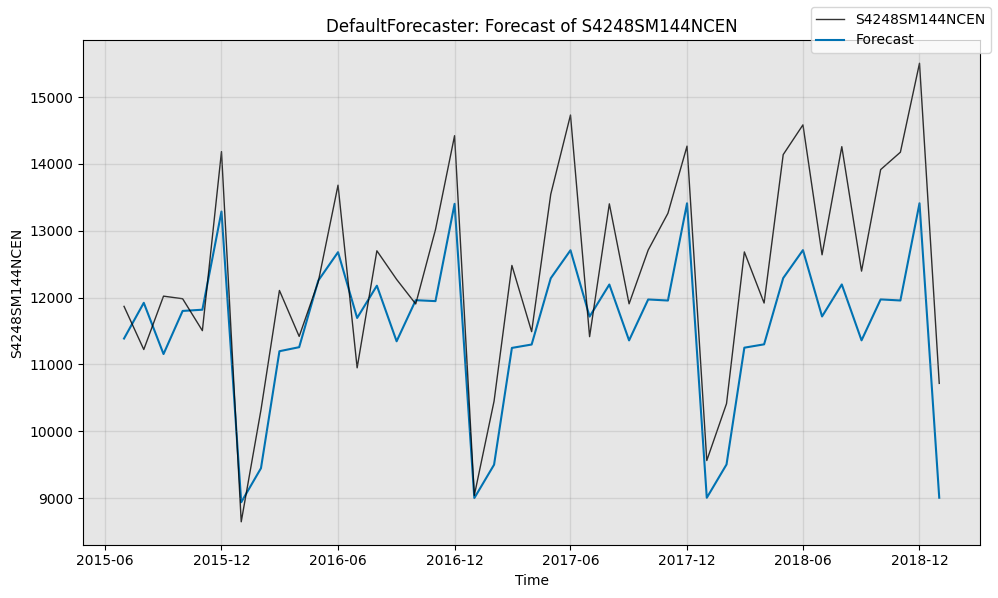

In [10]:
from merlion.models.defaults import DefaultForecasterConfig, DefaultForecaster

model = DefaultForecaster(DefaultForecasterConfig())
model.train(train_data = df_ts_train)

model_fc = model.forecast(df_ts_test.time_stamps)

fig, ax = model.plot_forecast(time_series=df_ts_test)
plt.show()

In [11]:
from merlion.models.forecast.trees import LGBMForecaster, LGBMForecasterConfig
from merlion.models.automl.autosarima import AutoSarima, AutoSarimaConfig

from merlion.evaluate.forecast import ForecastMetric
from merlion.models.ensemble.combine import Mean, ModelSelector
from merlion.models.ensemble.forecast import ForecasterEnsemble, ForecasterEnsembleConfig

from merlion.models.ensemble.base import EnsembleTrainConfig

lgbm_config = LGBMForecasterConfig(maxlags = 30,max_forecast_steps=len(df_ts_test))
lgbm = LGBMForecaster(lgbm_config)

sarima_config = AutoSarimaConfig(auto_pqPQ=True, auto_d=True, auto_D=True, auto_seasonality=True,approximation=True, maxiter=5)
sarima = AutoSarima(sarima_config)

ensemble_config = ForecasterEnsembleConfig(
    combiner=Mean(), models=[lgbm,sarima]
)

ensemble_train_config = EnsembleTrainConfig(valid_frac=0.2,per_model_train_configs=[None,{"enforce_stationarity": True,"enforce_invertibility": True}])

ensemble = ForecasterEnsemble(config=ensemble_config)
ensemble.train(df_ts_train,train_config=ensemble_train_config)
ensemble.forecast(df_ts_test.time_stamps)

Inferred granularity <MonthBegin>
Inferred granularity <MonthBegin>
Inferred granularity <MonthBegin>


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000308 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 252, number of used features: 30
[LightGBM] [Info] Start training from score 7560.261905
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

(            S4248SM144NCEN
 time                      
 2015-07-01    11204.980997
 2015-08-01    11397.409314
 2015-09-01    11600.661176
 2015-10-01    11611.205862
 2015-11-01    11197.403474
 2015-12-01    12870.818327
 2016-01-01     8705.849633
 2016-02-01     9504.608706
 2016-03-01    11231.071970
 2016-04-01    11132.484254
 2016-05-01    12098.911095
 2016-06-01    12450.651439
 2016-07-01    11218.430669
 2016-08-01    11760.215782
 2016-09-01    11721.568564
 2016-10-01    11596.693430
 2016-11-01    11735.962785
 2016-12-01    12852.692886
 2017-01-01     9016.190123
 2017-02-01    10036.681844
 2017-03-01    11379.058793
 2017-04-01    11252.593377
 2017-05-01    12426.939185
 2017-06-01    12423.344869
 2017-07-01    11396.103950
 2017-08-01    12083.114548
 2017-09-01    11712.353640
 2017-10-01    11818.243809
 2017-11-01    12061.107972
 2017-12-01    12828.360319
 2018-01-01     9567.478919
 2018-02-01    10635.121074
 2018-03-01    11418.524544
 2018-04-01    11677

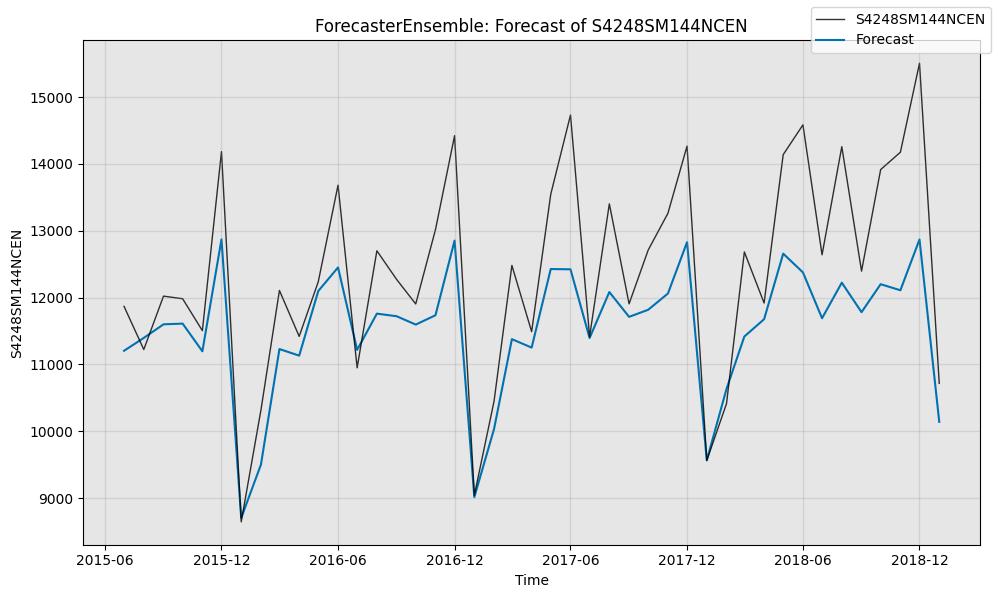

In [15]:
fig, ax = ensemble.plot_forecast(time_series=df_ts_test)
plt.show()

In [16]:
from merlion.models.forecast.trees import LGBMForecaster, LGBMForecasterConfig
from merlion.models.automl.autosarima import AutoSarima, AutoSarimaConfig

from merlion.evaluate.forecast import ForecastMetric
from merlion.models.ensemble.combine import Mean, ModelSelector
from merlion.models.ensemble.forecast import ForecasterEnsemble, ForecasterEnsembleConfig
from merlion.models.defaults import DefaultForecasterConfig, DefaultForecaster

from merlion.evaluate.forecast import ForecastMetric
lgbm_config = LGBMForecasterConfig(maxlags = 5,max_forecast_steps=len(df_ts_test))
lgbm = LGBMForecaster(lgbm_config)

sarima_config = AutoSarimaConfig(auto_pqPQ=True, auto_d=True, auto_D=True, auto_seasonality=True,approximation=True, maxiter=5)
sarima = AutoSarima(sarima_config)

model3 = DefaultForecaster(DefaultForecasterConfig())
selector_config = ForecasterEnsembleConfig(combiner=ModelSelector(metric=ForecastMetric.sMAPE))
selector = ForecasterEnsemble(config=selector_config, models=[lgbm, sarima,model3])

selector.train(df_ts_train)
selector.forecast(df_ts_test.time_stamps)

Inferred granularity <MonthBegin>
Inferred granularity <MonthBegin>


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 220, number of used features: 5
[LightGBM] [Info] Start training from score 6443.931818
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

ForecastEvaluator: 100%|██████████| 147225600/147225600 [00:00<00:00, 1198029871.71it/s]
Inferred granularity <MonthBegin>
ForecastEvaluator:   0%|          | 0/147225600 [00:00<?, ?it/s]C:\Users\shrav\AppData\Roaming\Python\Python311\site-packages\merlion\models\forecast\sarima.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_val = val_prev[-1]
ForecastEvaluator:  77%|███████▋  | 113011200/147225600 [00:00<00:00, 606493695.46it/s]C:\Users\shrav\AppData\Roaming\Python\Python311\site-packages\merlion\models\forecast\sarima.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_val = val_prev[-1]
Forecast

(            S4248SM144NCEN
 time                      
 2015-07-01    10858.357333
 2015-08-01    11269.885514
 2015-09-01    11491.738686
 2015-10-01    11539.047763
 2015-11-01    11020.627817
 2015-12-01    13741.320318
 2016-01-01     8406.340983
 2016-02-01     9546.187583
 2016-03-01    11280.586331
 2016-04-01    10916.437578
 2016-05-01    12202.139270
 2016-06-01    13110.705558
 2016-07-01    10885.256677
 2016-08-01    11953.915180
 2016-09-01    11696.236270
 2016-10-01    11573.214771
 2016-11-01    11745.479680
 2016-12-01    13818.595588
 2017-01-01     8609.267738
 2017-02-01    10177.864631
 2017-03-01    11339.159935
 2017-04-01    11148.470304
 2017-05-01    12825.494461
 2017-06-01    13070.665326
 2017-07-01    11240.603238
 2017-08-01    12477.547079
 2017-09-01    11677.806422
 2017-10-01    12001.359363
 2017-11-01    12191.071067
 2017-12-01    13815.474097
 2018-01-01     9095.426387
 2018-02-01    10543.290309
 2018-03-01    11370.718334
 2018-04-01    11672

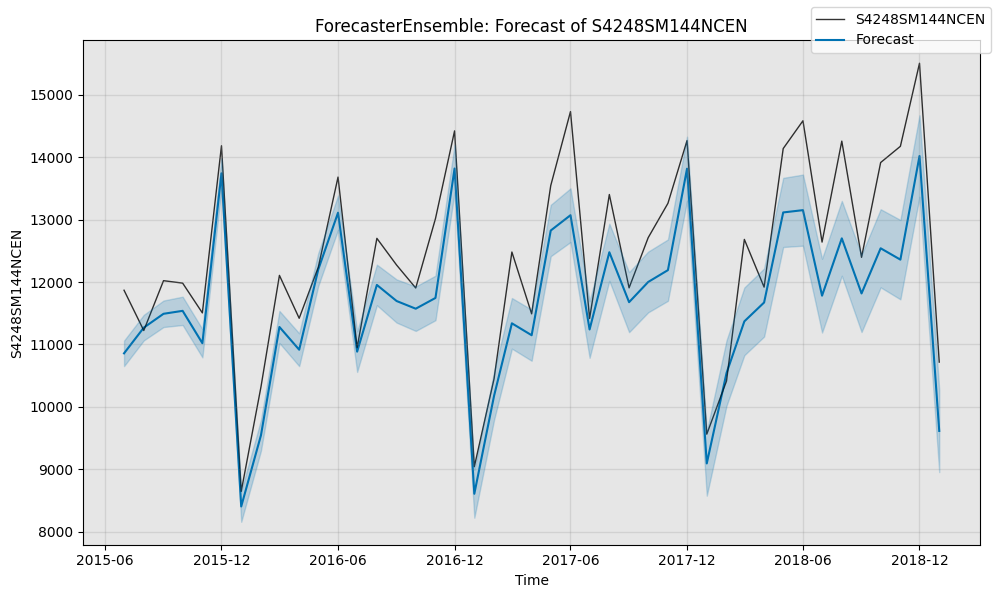

In [17]:
fig, ax = selector.plot_forecast(time_series=df_ts_test,plot_forecast_uncertainty=True)
plt.show()

In [17]:
import pandas as pd
import numpy as np
from merlion.utils import TimeSeries
from merlion.evaluate.forecast import ForecastMetric
from merlion.models.automl.autosarima import AutoSarima, AutoSarimaConfig
from merlion.models.forecast.trees import LGBMForecaster, LGBMForecasterConfig
from merlion.models.defaults import DefaultForecasterConfig, DefaultForecaster
from merlion.models.ensemble.combine import Mean, ModelSelector
from merlion.models.ensemble.forecast import ForecasterEnsemble, ForecasterEnsembleConfig
from merlion.models.ensemble.base import EnsembleTrainConfig

df = pd.read_csv("Bitcoin_price.csv")
df.set_index('DATE', inplace=True)
df.index = pd.to_datetime(df.index)
df.index.freq = 'MS'

df_ts = TimeSeries.from_pd(df, freq='MS')
print(df_ts.is_aligned)
df_ts_train, df_ts_test = df_ts.bisect('2017-07-01')

sarima_config = AutoSarimaConfig(
auto_pqPQ=True,
auto_d=True,
auto_D=True,
auto_seasonality=True,
approximation=False, # Disable approximation for more accuracy
maxiter=50, # Increase maximum iterations
max_order=10, # Increase the maximum order to allow more flexibility
max_seasonal_order=10 # Increase maximum seasonal order
)
sarima = AutoSarima(sarima_config)
sarima.train(df_ts_train, train_config={"enforce_stationarity": True, "enforce_invertibility": True})

lgbm_config = LGBMForecasterConfig(maxlags=30, max_forecast_steps=len(df_ts_test))
lgbm = LGBMForecaster(lgbm_config)
lgbm.train(df_ts_train)

model3 = DefaultForecaster(DefaultForecasterConfig())
model3.train(train_data=df_ts_train)

selector_config = ForecasterEnsembleConfig(combiner=ModelSelector(metric=ForecastMetric.sMAPE))
selector = ForecasterEnsemble(config=selector_config, models=[lgbm, sarima, model3])
selector.train(df_ts_train)

#Forecast
sarima_fc = sarima.forecast(df_ts_test.time_stamps)
lgbm_fc = lgbm.forecast(df_ts_test.time_stamps)
model3_fc = model3.forecast(df_ts_test.time_stamps)
selector_fc = selector.forecast(df_ts_test.time_stamps)

print("SARIMA forecast:", sarima_fc)
print("LGBM forecast:", lgbm_fc)
print("Default Forecaster forecast:", model3_fc)
print("Selector forecast:", selector_fc)

sarima_fc = sarima_fc[0]
lgbm_fc = lgbm_fc[0]
model3_fc = model3_fc[0]
selector_fc = selector_fc[0]

metrics = [ForecastMetric.sMAPE, ForecastMetric.MAE] 

def evaluate_forecasts(true_data, forecast_data, metrics):
    results = {}
    for metric in metrics:
        results[metric.name] = metric.value(true_data, forecast_data)
    return results

sarima_accuracy = evaluate_forecasts(df_ts_test, sarima_fc, metrics)
lgbm_accuracy = evaluate_forecasts(df_ts_test, lgbm_fc, metrics)
model3_accuracy = evaluate_forecasts(df_ts_test, model3_fc, metrics)
selector_accuracy = evaluate_forecasts(df_ts_test, selector_fc, metrics)

print("SARIMA Accuracy:", sarima_accuracy)
print("LGBM Accuracy:", lgbm_accuracy)
print("Default Forecaster Accuracy:", model3_accuracy)
print("Model Selector Accuracy:", selector_accuracy)

sarima_mae = sarima_accuracy["MAE"]
lgbm_mae = lgbm_accuracy["MAE"]
model3_mae = model3_accuracy["MAE"]
selector_mae = selector_accuracy["MAE"]

total_mae = sarima_mae + lgbm_mae + model3_mae + selector_mae

sarima_ratio = 1 - (sarima_mae / total_mae)
lgbm_ratio = 1 - (lgbm_mae / total_mae)
model3_ratio = 1 - (model3_mae / total_mae)
selector_ratio = 1 - (selector_mae / total_mae)

print("SARIMA MAE Ratio:", sarima_ratio)
print("LGBM MAE Ratio:", lgbm_ratio)
print("Default Forecaster MAE Ratio:", model3_ratio)
print("Model Selector MAE Ratio:", selector_ratio)


Inferred granularity <MonthBegin>


True


Inferred granularity <MonthBegin>
Inferred granularity <MonthBegin>


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000494 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2790
[LightGBM] [Info] Number of data points in the train set: 276, number of used features: 30
[LightGBM] [Info] Start training from score 7947.079710
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

C:\Users\shrav\AppData\Roaming\Python\Python311\site-packages\merlion\models\forecast\ets.py:145: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self._last_val = train_data[-1]
C:\Users\shrav\AppData\Roaming\Python\Python311\site-packages\merlion\models\forecast\ets.py:145: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self._last_val = train_data[-1]
C:\Users\shrav\AppData\Roaming\Python\Python311\site-packages\merlion\models\forecast\ets.py:145: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame beha

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2186
[LightGBM] [Info] Number of data points in the train set: 215, number of used features: 30
[LightGBM] [Info] Start training from score 7001.427907
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

ForecastEvaluator: 100%|██████████| 157766400/157766400 [00:00<00:00, 573872425.55it/s]
Inferred granularity <MonthBegin>
ForecastEvaluator:   0%|          | 0/157766400 [00:00<?, ?it/s]C:\Users\shrav\AppData\Roaming\Python\Python311\site-packages\merlion\models\forecast\sarima.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_val = val_prev[-1]
ForecastEvaluator:  32%|███▏      | 50025600/157766400 [00:00<00:00, 358558289.67it/s]C:\Users\shrav\AppData\Roaming\Python\Python311\site-packages\merlion\models\forecast\sarima.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_val = val_prev[-1]
ForecastEv

SARIMA forecast: (            S4248SM144NCEN
time                      
2017-07-01    11396.357853
2017-08-01    13567.932487
2017-09-01    12957.530544
2017-10-01    12583.318130
2017-11-01    13628.685969
2017-12-01    14978.646221
2018-01-01     9888.068491
2018-02-01    11260.686205
2018-03-01    12917.810793
2018-04-01    12406.446767
2018-05-01    14115.567641
2018-06-01    15043.417712
2018-07-01    12527.697852
2018-08-01    13976.816328
2018-09-01    13537.634456
2018-10-01    13446.208151
2018-11-01    14000.211039
2018-12-01    15612.495788
2019-01-01    10632.635478,             S4248SM144NCEN_err
time                          
2017-07-01          326.372929
2017-08-01          328.571120
2017-09-01          333.256990
2017-10-01          382.770428
2017-11-01          382.796850
2017-12-01          397.744896
2018-01-01          413.869527
2018-02-01          415.581911
2018-03-01          430.257421
2018-04-01          438.499531
2018-05-01          443.399091
2018-06-01 